# Costs

In [15]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp
from datetime import datetime
from pytz import timezone

from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline 
#%matplotlib qt

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


Bad key legend.labelcolor in file style.txt, line 43 ('legend.labelcolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


### Load files

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                 's15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25']
savefig = False
folder_to_save_results="results_v2/"

figure_names={'s1':1,'s2':2,'s3':3,'s4':4,'s5':5,'s6':6,'s7':7,'s8':8,'s9':9,'s10':10,'s11':11,'s12':12,'s13':13,
              's14':14,'s15':15,'s16':16,'s17':17,'s18':18,'s19':19,'s20':20,'s21':21,'s22':22,'s23':23,'s24':24,
              's25':25}

In [4]:
fname = "costs_itemized.csv"
costs= get_data_sftp(hostname, username, scenario_name, fname)
costs = costs.replace({"scenario": figure_names})
costs = costs.astype({'scenario':'int'})
costs

,PERIOD,Component,Component_type,AnnualCost_NPV,AnnualCost_Real,scenario
0,2020,TotalGenFixedCosts,annual,"52,325,000,000.00","6,146,400,000.00",1
1,2020,StorageEnergyFixedCost,annual,0.00,0.00,1
2,2020,FuelCostsPerPeriod,annual,"100,970,000,000.00","11,861,000,000.00",1
3,2020,TxFixedCosts,annual,0.00,0.00,1
4,2020,EmissionsCosts,annual,0.00,0.00,1
...,...,...,...,...,...,...
19,2050,EmissionsCosts,annual,0.00,0.00,25
20,2020,GenVariableOMCostsInTP,timepoint,"16,273,000,000.00","1,911,500,000.00",25
21,2030,GenVariableOMCostsInTP,timepoint,"8,852,300,000.00","1,693,800,000.00",25
22,2040,GenVariableOMCostsInTP,timepoint,"3,445,800,000.00","1,073,900,000.00",25


## Costs (NPV)

### Data transformations

In [7]:
costsNPV_by_scenario = costs.pivot_table(
    index="scenario", columns="Component", values="AnnualCost_NPV", aggfunc=np.sum
)
costsNPV_by_scenario.reindex(columns=["TotalGenFixedCosts", "StorageEnergyFixedCost", "FuelCostsPerPeriod", "TxFixedCosts",
                          "EmissionsCosts", "GenVariableOMCostsInTP"])

# costsNPV_by_scenario['indexNumber']=[scenario_name.index(costsNPV_by_scenario.index[i]) for i in range(0,len(scenario_name))]
# costsNPV_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
# del costsNPV_by_scenario['indexNumber']


costsNPV_by_scenario['Total']=[costsNPV_by_scenario.sum(axis=1)[i] for i in range(1,len(scenario_name)+1)]
costsNPV_by_scenario

Component,EmissionsCosts,FuelCostsPerPeriod,GenVariableOMCostsInTP,StorageEnergyFixedCost,TotalGenFixedCosts,TxFixedCosts,Total
scenario,,,,,,,
1,0.00,"200,623,700,000.00","29,188,790,000.00","39,622,600,000.00","362,029,000,000.00","17,289,180,000.00","648,753,270,000.00"
2,0.00,"200,722,700,000.00","29,218,740,000.00","38,887,000,000.00","362,604,000,000.00","17,021,550,000.00","648,453,990,000.00"
3,0.00,"200,776,700,000.00","29,227,640,000.00","38,305,300,000.00","362,374,000,000.00","16,887,110,000.00","647,570,750,000.00"
4,0.00,"200,798,700,000.00","29,238,760,000.00","36,828,900,000.00","362,377,000,000.00","16,702,710,000.00","645,946,070,000.00"
5,0.00,"200,803,700,000.00","29,245,760,000.00","36,417,600,000.00","360,901,000,000.00","16,754,960,000.00","644,123,020,000.00"
6,0.00,"200,537,700,000.00","29,167,290,000.00","39,224,700,000.00","362,230,000,000.00","17,392,500,000.00","648,552,190,000.00"
7,0.00,"200,608,700,000.00","29,193,940,000.00","38,542,400,000.00","362,790,000,000.00","17,115,520,000.00","648,250,560,000.00"
8,0.00,"200,653,700,000.00","29,201,340,000.00","37,958,500,000.00","362,581,000,000.00","16,986,470,000.00","647,381,010,000.00"
9,0.00,"200,743,700,000.00","29,223,360,000.00","36,570,900,000.00","362,375,000,000.00","16,851,020,000.00","645,763,980,000.00"


In [8]:
s = costsNPV_by_scenario.select_dtypes(include=[np.number])*1E-9
costsNPV_by_scenario[s.columns] = s
costsNPV_by_scenario

Component,EmissionsCosts,FuelCostsPerPeriod,GenVariableOMCostsInTP,StorageEnergyFixedCost,TotalGenFixedCosts,TxFixedCosts,Total
scenario,,,,,,,
1,0.00,200.62,29.19,39.62,362.03,17.29,648.75
2,0.00,200.72,29.22,38.89,362.60,17.02,648.45
3,0.00,200.78,29.23,38.31,362.37,16.89,647.57
4,0.00,200.80,29.24,36.83,362.38,16.70,645.95
5,0.00,200.80,29.25,36.42,360.90,16.75,644.12
6,0.00,200.54,29.17,39.22,362.23,17.39,648.55
7,0.00,200.61,29.19,38.54,362.79,17.12,648.25
8,0.00,200.65,29.20,37.96,362.58,16.99,647.38
9,0.00,200.74,29.22,36.57,362.38,16.85,645.76


In [9]:
costsNPV_by_scenario = costsNPV_by_scenario.rename({
        "GenVariableOMCostsInTP": "Var OM Gen Costs",
        "FuelCostsPerPeriod": "Fuel Costs",
        "StorageEnergyFixedCost": "StorageFixed Costs",
        "TotalGenFixedCosts": "Gen Fixed Costs",
        "TxFixedCosts": "Tx Fixed Costs"
    }, axis=1)

cost_types=["Var OM Gen Costs", 
        "Fuel Costs",
        "StorageFixed Costs",
        "Gen Fixed Costs",
        "Tx Fixed Costs"]
del costsNPV_by_scenario['EmissionsCosts']
costsNPV_by_scenario

Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
1,200.62,29.19,39.62,362.03,17.29,648.75
2,200.72,29.22,38.89,362.60,17.02,648.45
3,200.78,29.23,38.31,362.37,16.89,647.57
4,200.80,29.24,36.83,362.38,16.70,645.95
5,200.80,29.25,36.42,360.90,16.75,644.12
6,200.54,29.17,39.22,362.23,17.39,648.55
7,200.61,29.19,38.54,362.79,17.12,648.25
8,200.65,29.20,37.96,362.58,16.99,647.38
9,200.74,29.22,36.57,362.38,16.85,645.76


In [11]:
costs_npv_scen_map = pd.DataFrame(range(1,6))
costs_npv_scen_map = costs_npv_scen_map.rename(columns={0:'1'})
costs_npv_scen_map['2'] = 0
costs_npv_scen_map['3'] = 0
costs_npv_scen_map['4'] = 0
costs_npv_scen_map['5'] = 0
for i in range(1,6):
    costs_npv_scen_map.loc[i-1,'1'] = costsNPV_by_scenario.loc[i,'Total']

for i in range(6,11):
    costs_npv_scen_map.loc[i-6,'2'] = costsNPV_by_scenario.loc[i,'Total']

for i in range(11,16):
    costs_npv_scen_map.loc[i-11,'3'] = costsNPV_by_scenario.loc[i,'Total']

for i in range(16,21):
    costs_npv_scen_map.loc[i-16,'4'] = costsNPV_by_scenario.loc[i,'Total']

for i in range(21,26):
    costs_npv_scen_map.loc[i-21,'5'] = costsNPV_by_scenario.loc[i,'Total']

costs_npv_scen_map = costs_npv_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})

costs_npv_by_scen_list = []
for i in range(1,len(costs_npv_scen_map)+1):
    row_list = costs_npv_scen_map.loc[i, :].values.flatten().tolist()
    costs_npv_by_scen_list = costs_npv_by_scen_list + row_list

costs_npv_scen_map.style.background_gradient(cmap="Oranges",axis=None)

,1,2,3,4,5
1,648.753270,648.552190,644.697810,640.149260,634.952150
2,648.453990,648.250560,644.527290,640.007050,634.813720
3,647.570750,647.381010,643.996470,639.553740,634.491120
4,645.946070,645.763980,642.739080,638.599060,633.720700
5,644.123020,643.953910,641.022410,637.137730,632.543080


In [19]:
costs_npv_scen_map_for_paper = costs_npv_scen_map.copy()
costs_npv_scen_map_for_paper = costs_npv_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
costs_npv_scen_map_for_paper = costs_npv_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
costs_npv_scen_map_for_paper = costs_npv_scen_map_for_paper.style.background_gradient(cmap="Oranges",axis=None).set_precision(2)
costs_npv_scen_map_for_paper

<ipython-input-19-6a7b1eb7a441>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  costs_npv_scen_map_for_paper = costs_npv_scen_map_for_paper.style.background_gradient(cmap="Oranges",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",648.75,648.55,644.70,640.15,634.95
"$1,333",648.45,648.25,644.53,640.01,634.81
$760,647.57,647.38,644.00,639.55,634.49
$618,645.95,645.76,642.74,638.60,633.72
$400,644.12,643.95,641.02,637.14,632.54


In [17]:
costs_npv_by_scen_list = []
for i in range(1,len(costs_npv_scen_map)+1):
    row_list = costs_npv_scen_map.loc[i, :].values.flatten().tolist()
    costs_npv_by_scen_list = costs_npv_by_scen_list + row_list
costs_npv_by_scen_list

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = costs_npv_by_scen_list

cmap = cm.get_cmap('Oranges')
norm = Normalize(vmin=630, vmax=650)
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('System Cost NPV (Billion USD)', rotation=270, fontsize = 8, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('System Cost NPV (Billion USD)',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=5)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

<ipython-input-17-3dd299ba7ffc>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
<ipython-input-17-3dd299ba7ffc>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


<ipython-input-7-71af2d9e3c57>:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Costs (Billion USD) NPV.tex",index=True,


Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
s1,200.62,29.19,39.62,362.03,17.29,648.75
s2,200.72,29.22,38.89,362.60,17.02,648.45
s3,200.78,29.23,38.31,362.37,16.89,647.57
s4,200.80,29.24,36.83,362.38,16.70,645.95
s5,200.80,29.25,36.42,360.90,16.75,644.12
s6,200.54,29.17,39.22,362.23,17.39,648.55
s7,200.61,29.19,38.54,362.79,17.12,648.25
s8,200.65,29.20,37.96,362.58,16.99,647.38
s9,200.74,29.22,36.57,362.38,16.85,645.76


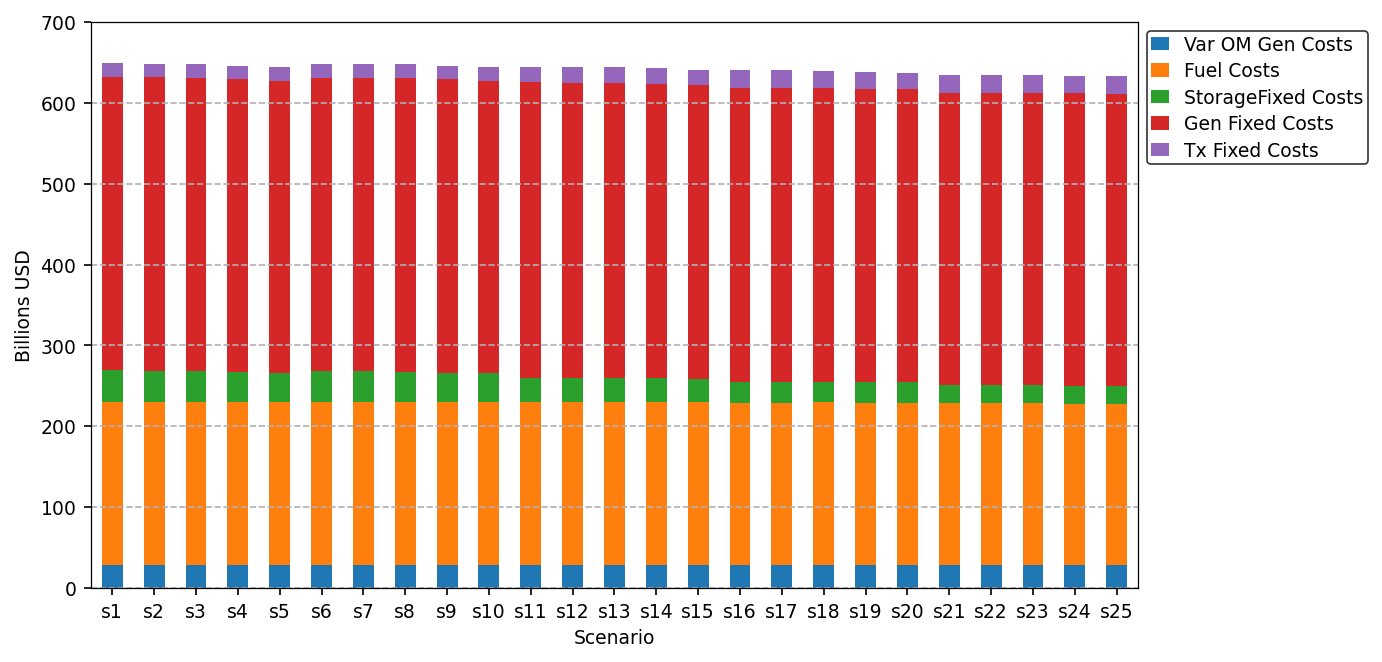

In [7]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,5), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = costsNPV_by_scenario[cost_types].plot.bar(stacked=True,ax=ax, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Billions USD", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Costs (Billion USD) NPV.png", transparent=False)

#Rename for spaces purposes
data=costsNPV_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Costs (Billion USD) NPV.tex",index=True,
                                  float_format='%.2f',
                                  caption="Costs (Billion USD) NPV")

#Show dataframe
costsNPV_by_scenario

## Costs (REAL)

In [8]:
costsReal_by_scenario = costs.pivot_table(
    index="scenario", columns="Component", values="AnnualCost_Real", aggfunc=np.sum
)
costsReal_by_scenario.reindex(columns=["TotalGenFixedCosts", "StorageEnergyFixedCost", "FuelCostsPerPeriod", "TxFixedCosts",
                          "EmissionsCosts", "GenVariableOMCostsInTP"])

costsReal_by_scenario['indexNumber']=[scenario_name.index(costsReal_by_scenario.index[i]) for i in range(0,len(scenario_name))]
costsReal_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del costsReal_by_scenario['indexNumber']
costsReal_by_scenario

costsReal_by_scenario['Total']=[costsReal_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]

In [9]:
s = costsReal_by_scenario.select_dtypes(include=[np.number])*1E-9
costsReal_by_scenario[s.columns] = s
costsReal_by_scenario

Component,EmissionsCosts,FuelCostsPerPeriod,GenVariableOMCostsInTP,StorageEnergyFixedCost,TotalGenFixedCosts,TxFixedCosts,Total
scenario,,,,,,,
s1,0.00,34.63,4.93,18.68,116.42,7.30,181.96
s2,0.00,34.64,4.93,18.39,116.70,7.19,181.86
s3,0.00,34.65,4.93,18.10,116.64,7.13,181.46
s4,0.00,34.65,4.94,17.35,116.69,7.06,180.68
s5,0.00,34.65,4.94,17.16,115.98,7.09,179.82
s6,0.00,34.62,4.93,18.52,116.45,7.35,181.86
s7,0.00,34.63,4.93,18.26,116.71,7.23,181.76
s8,0.00,34.63,4.93,17.96,116.66,7.17,181.36
s9,0.00,34.64,4.93,17.25,116.64,7.13,180.60


In [10]:
costsReal_by_scenario = costsReal_by_scenario.rename({
        "GenVariableOMCostsInTP": "Var OM Gen Costs",
        "FuelCostsPerPeriod": "Fuel Costs",
        "StorageEnergyFixedCost": "StorageFixed Costs",
        "TotalGenFixedCosts": "Gen Fixed Costs",
        "TxFixedCosts": "Tx Fixed Costs"
    }, axis=1)

cost_types=["Var OM Gen Costs", 
        "Fuel Costs",
        "StorageFixed Costs",
        "Gen Fixed Costs",
        "Tx Fixed Costs"]
del costsReal_by_scenario['EmissionsCosts']
costsReal_by_scenario

Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
s1,34.63,4.93,18.68,116.42,7.30,181.96
s2,34.64,4.93,18.39,116.70,7.19,181.86
s3,34.65,4.93,18.10,116.64,7.13,181.46
s4,34.65,4.94,17.35,116.69,7.06,180.68
s5,34.65,4.94,17.16,115.98,7.09,179.82
s6,34.62,4.93,18.52,116.45,7.35,181.86
s7,34.63,4.93,18.26,116.71,7.23,181.76
s8,34.63,4.93,17.96,116.66,7.17,181.36
s9,34.64,4.93,17.25,116.64,7.13,180.60


<ipython-input-11-d1705daddfc7>:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Real Costs (Billion USD).tex",index=True,


Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
s1,34.63,4.93,18.68,116.42,7.30,181.96
s2,34.64,4.93,18.39,116.70,7.19,181.86
s3,34.65,4.93,18.10,116.64,7.13,181.46
s4,34.65,4.94,17.35,116.69,7.06,180.68
s5,34.65,4.94,17.16,115.98,7.09,179.82
s6,34.62,4.93,18.52,116.45,7.35,181.86
s7,34.63,4.93,18.26,116.71,7.23,181.76
s8,34.63,4.93,17.96,116.66,7.17,181.36
s9,34.64,4.93,17.25,116.64,7.13,180.60


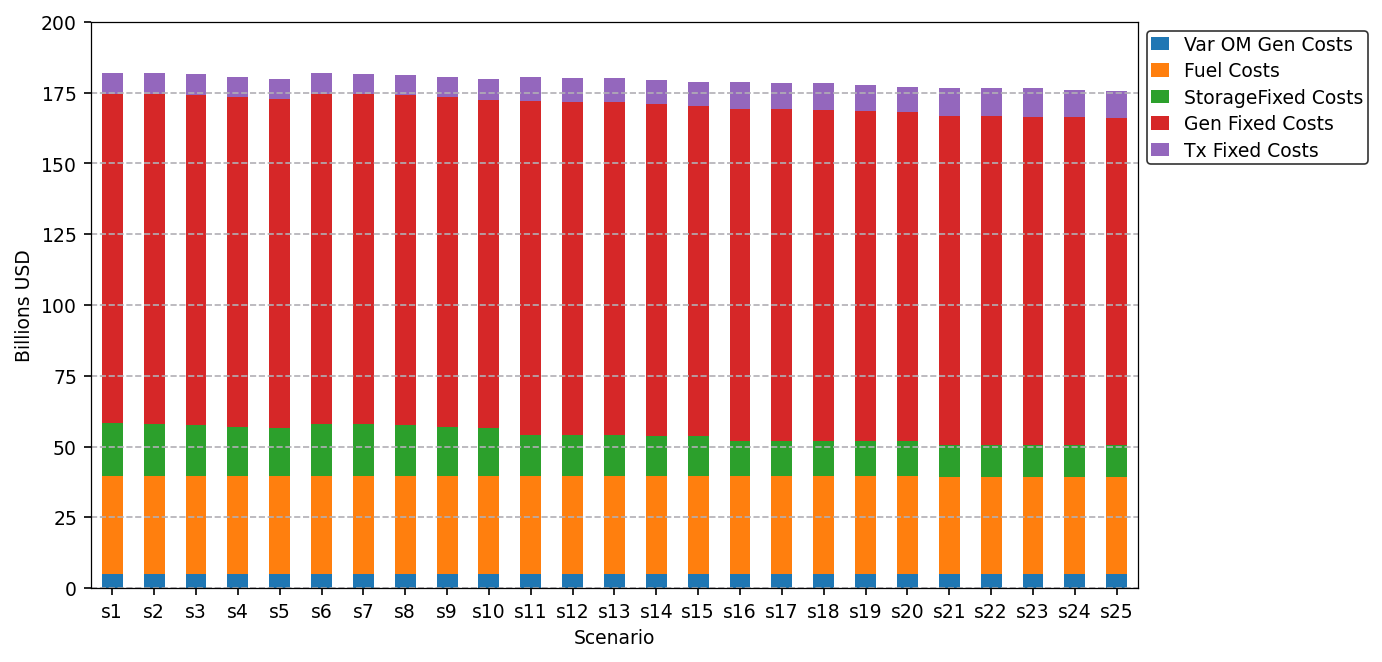

In [11]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,5), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = costsReal_by_scenario[cost_types].plot.bar(stacked=True,ax=ax, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Billions USD", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Real costs (Billion USD).png", transparent=False)

#Rename for spaces purposes
data=costsReal_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Real Costs (Billion USD).tex",index=True,
                                  float_format='%.2f',
                                  caption="Real Costs (Billion USD)")

#Show dataframe
costsReal_by_scenario